In [7]:
import cv2
import numpy as np
import os
import imutils

# Load the large image
large_image = cv2.imread('large.jpg')
large_image = imutils.resize(large_image, width=4096)

# Directory containing tile images
tile_dir = 'tiles_images/'
tile_images = [cv2.imread(os.path.join(tile_dir, img)) for img in os.listdir(tile_dir)]


In [8]:
def caltilesize(large_image, num_horizontal_tiles, num_vertical_tiles):
    print(large_image.shape)
    rectangle_height = large_image.shape[0]
    rectangle_width = large_image.shape[1]
    tile_width = rectangle_width / num_horizontal_tiles
    tile_height = rectangle_height / num_vertical_tiles

    return int(tile_width), int(tile_height)

In [9]:
tile_size = caltilesize(large_image, 10, 10)
tile_size

(5529, 4096, 3)


(409, 552)

In [10]:
def color_match_and_blend(region, tile):
        # Resize the tile to match the size of the region
        tile_resized = cv2.resize(tile, (region.shape[1], region.shape[0]))
        
        # Compute the average color of the region and resized tile
        region_avg_color = np.mean(region, axis=(0, 1))
        tile_avg_color = np.mean(tile_resized, axis=(0, 1))
        
        # Calculate the color difference between region and resized tile
        color_diff = np.linalg.norm(region_avg_color - tile_avg_color)
        
        # Blend the region and resized tile based on color similarity
        alpha = 1.0 - (color_diff / 255.0)  # Adjust alpha based on color difference
        blended_region = cv2.addWeighted(region, alpha, tile_resized, 1.0 - alpha, 0)
        
        return blended_region

In [11]:
def crop_image(image, crop_width, crop_height):
        max_resize = max(crop_height, crop_width, image.shape[0],image.shape[1])
        # if max_resize < crop_height or max_resize < crop_width:
        #     max_resize = 2 * max_resize
        image = imutils.resize(image, width=max_resize)

        image_height, image_width = image.shape[:2]
        start_x = (image_width - crop_width) // 2
        end_x = start_x + crop_width
        start_y = (image_height - crop_height) // 2
        end_y = start_y + crop_height
        cropped_image = image[start_y:end_y, start_x:end_x]
        return cropped_image

In [13]:
import random 
import imutils

mosaic = np.zeros_like(large_image)
used_tiles = []
used_tiles_length = len(tile_size)/2

for y in range(0, large_image.shape[0], tile_size[1]):
    for x in range(0, large_image.shape[1], tile_size[0]): 
        region = large_image[y:y + tile_size[1], x:x + tile_size[0]]
        region_avg_color = np.mean(region, axis=(0, 1))  
        min_diffs = []  # List to store minimum differences
        best_tiles = []
        
        for tile in tile_images:
            tile_avg_color = np.mean(tile, axis=(0, 1))
            color_diff = np.linalg.norm(region_avg_color - tile_avg_color)
                    
                    # Update min_diffs and best_tiles with top three minimum differences and corresponding tiles
            if len(min_diffs) < 3:
                min_diffs.append(color_diff)
                best_tiles.append(tile)
            else:
                max_diff_index = min_diffs.index(max(min_diffs))
                if color_diff < min_diffs[max_diff_index]:
                    min_diffs[max_diff_index] = color_diff
                    best_tiles[max_diff_index] = tile

                # Randomly select one tile from the top three minimum differences
        random_index = random.randint(0, 2)  # Random index between 0 and 2
        best_tile = best_tiles[random_index]

                # Add the selected tile to the used_tiles list
        used_tiles.append(best_tile)

                # Remove the oldest tile from used_tiles if necessary
        if len(used_tiles) > used_tiles_length:
            used_tiles.pop(0)
        
        blended_region = color_match_and_blend(region, crop_image(best_tile, crop_height=tile_size[1], crop_width=tile_size[0]))  
        img_curr = imutils.resize(blended_region,width=region.shape[1], height=region.shape[0]) 
        mosaic[y:y + tile_size[1], x:x + tile_size[0]] = img_curr

AxisError: axis 0 is out of bounds for array of dimension 0

In [7]:
cv2.imwrite('outputt6.jpeg', mosaic)

True

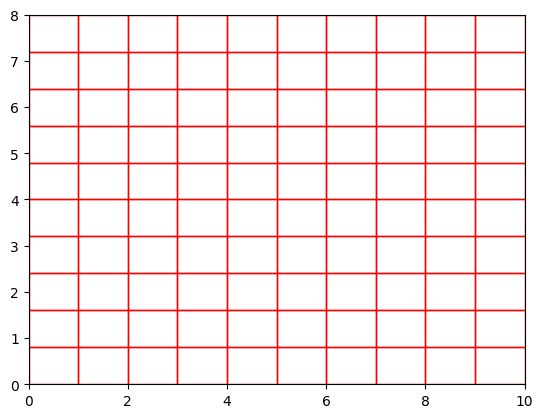

In [23]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def plot_tiles(rectangle_width, rectangle_height, num_horizontal_tiles, num_vertical_tiles):
    # Calculate the width and height of each tile
    tile_width = rectangle_width / num_horizontal_tiles
    tile_height = rectangle_height / num_vertical_tiles

    # Create a figure and axes
    fig, ax = plt.subplots()

    # Loop through horizontal and vertical tiles to plot each one
    for i in range(num_horizontal_tiles):
        for j in range(num_vertical_tiles):
            x = i * tile_width
            y = j * tile_height
            box = Rectangle((x, y), tile_width, tile_height, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(box)

    # Set axis limits based on the rectangle dimensions
    ax.set_xlim([0, rectangle_width])
    ax.set_ylim([0, rectangle_height])

    # Show the plot
    plt.show()

# Example usage:
rectangle_width = 10  # Width of the rectangle
rectangle_height = 8  # Height of the rectangle
num_horizontal_tiles = 10  # Number of tiles horizontally
num_vertical_tiles = 10  # Number of tiles vertically

plot_tiles(rectangle_width, rectangle_height, num_horizontal_tiles, num_vertical_tiles)


In [1]:
import cv2

img = cv2.imread('large_image.jpeg')


In [3]:
img.shape

(385, 686, 3)

In [29]:
import imutils

def crop_image(image, crop_width, crop_height):
    max_resize = max(crop_height, crop_width, image.shape[0],image.shape[1])
    max_resize = 2 * max_resize

    print(max_resize)
    image = imutils.resize(image, width=max_resize)
    print(image.shape)
    # Calculate center coordinates
    image_height, image_width = image.shape[:2]
    center_x = image_width // 2
    center_y = image_height // 2
    
    # Calculate half of the crop dimensions
    half_crop_width = crop_width // 2
    half_crop_height = crop_height // 2
    
    # Calculate crop boundaries
    start_x = center_x - half_crop_width
    end_x = center_x + half_crop_width
    start_y = center_y - half_crop_height
    end_y = center_y + half_crop_height
    
    # Crop the image from the center
    cropped_image = image[start_y:end_y, start_x:end_x]
    
    return cropped_image

In [30]:
img_crop = crop_image(img, 1000, 1000)

2000
(1122, 2000, 3)


In [31]:
img_crop.shape

(1000, 1000, 3)

In [32]:
cv2.imwrite('cropped2.jpg', img_crop)

True